In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import Log_Reg
import warnings

warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("default")
warnings.filterwarnings("default", category=DeprecationWarning)


In [2]:
df= pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df.corr

<bound method DataFrame.corr of       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2

<Axes: >

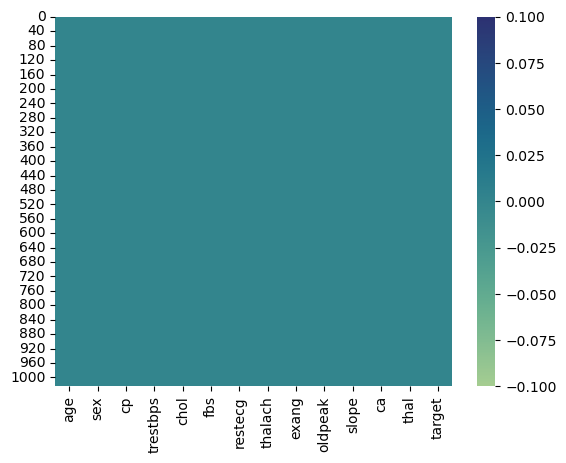

In [6]:
sns.heatmap(df.isnull(), cmap="crest")

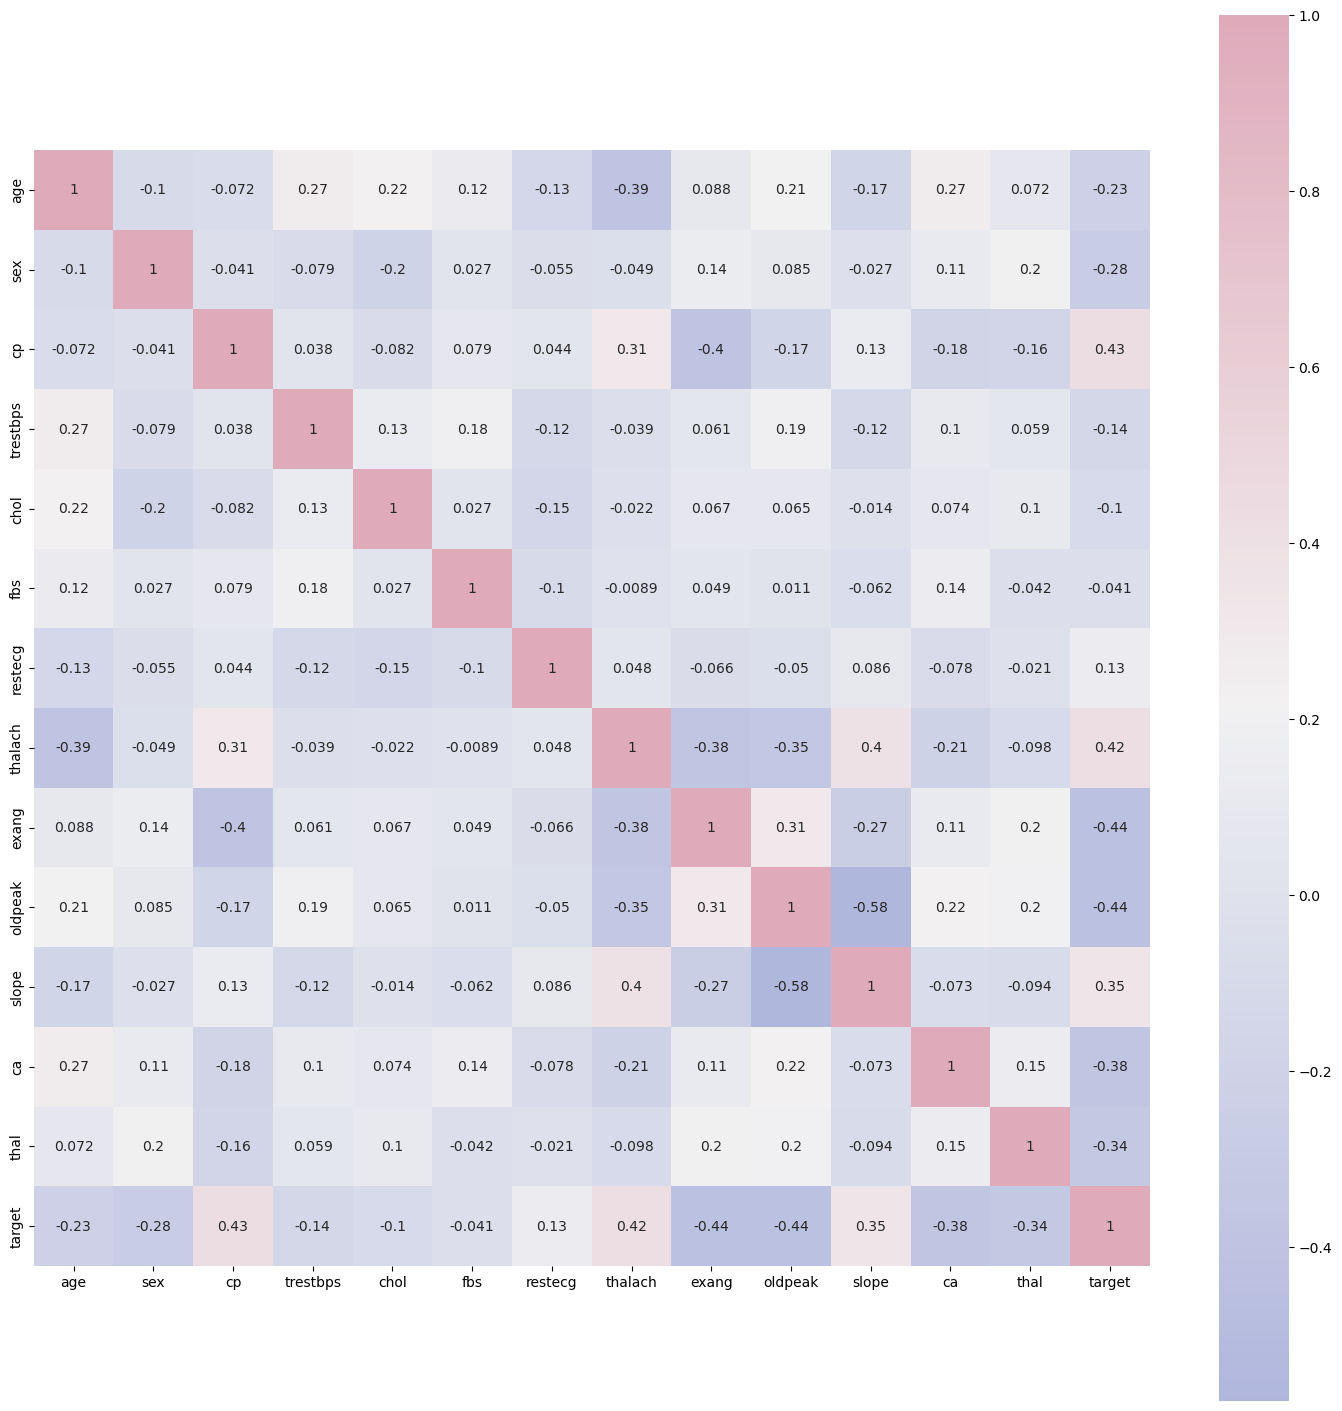

In [7]:
cmap=sns.diverging_palette(260,-10,s=50, l=75, n=6,
as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(df.corr(),cmap=cmap,annot=True, square=True)
plt.show()

<Axes: >

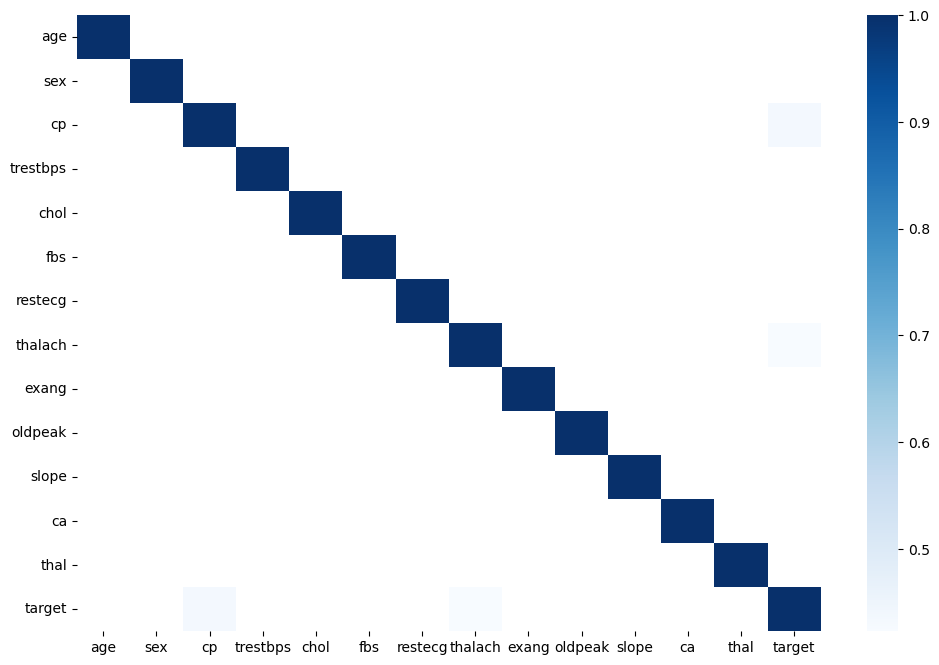

In [8]:
kot = df.corr()[df.corr()>=.40]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Blues")

In [9]:
df.describe

<bound method NDFrame.describe of       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0        

<function matplotlib.pyplot.show(close=None, block=None)>

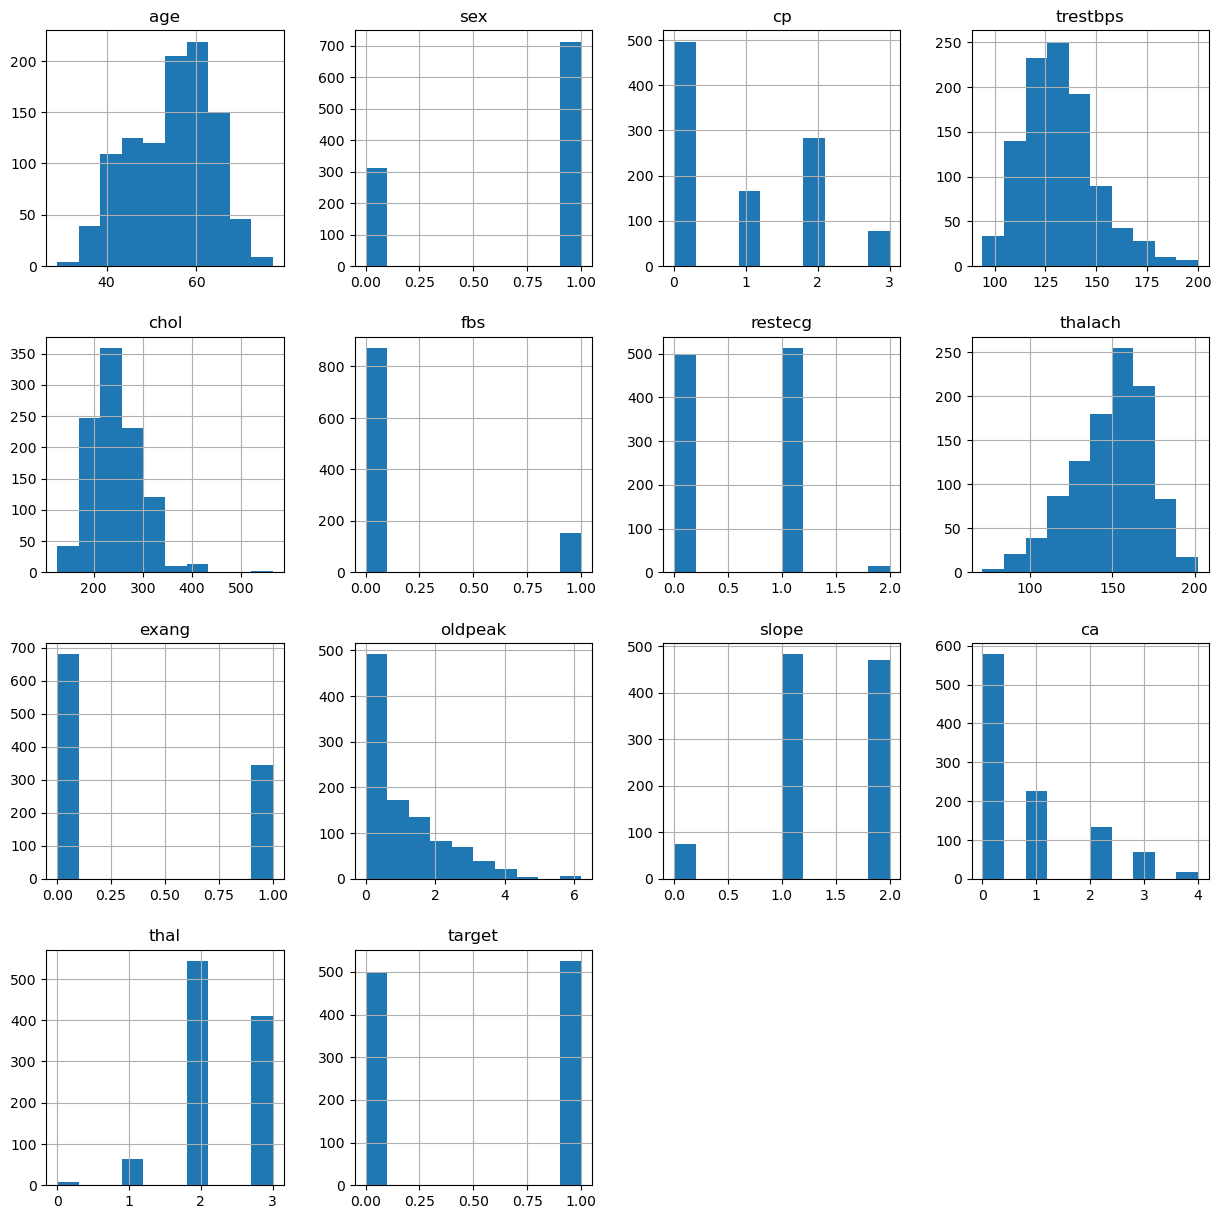

In [10]:
df.hist(figsize=(15,15))
plt.show

C:\Users\Nar Een\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


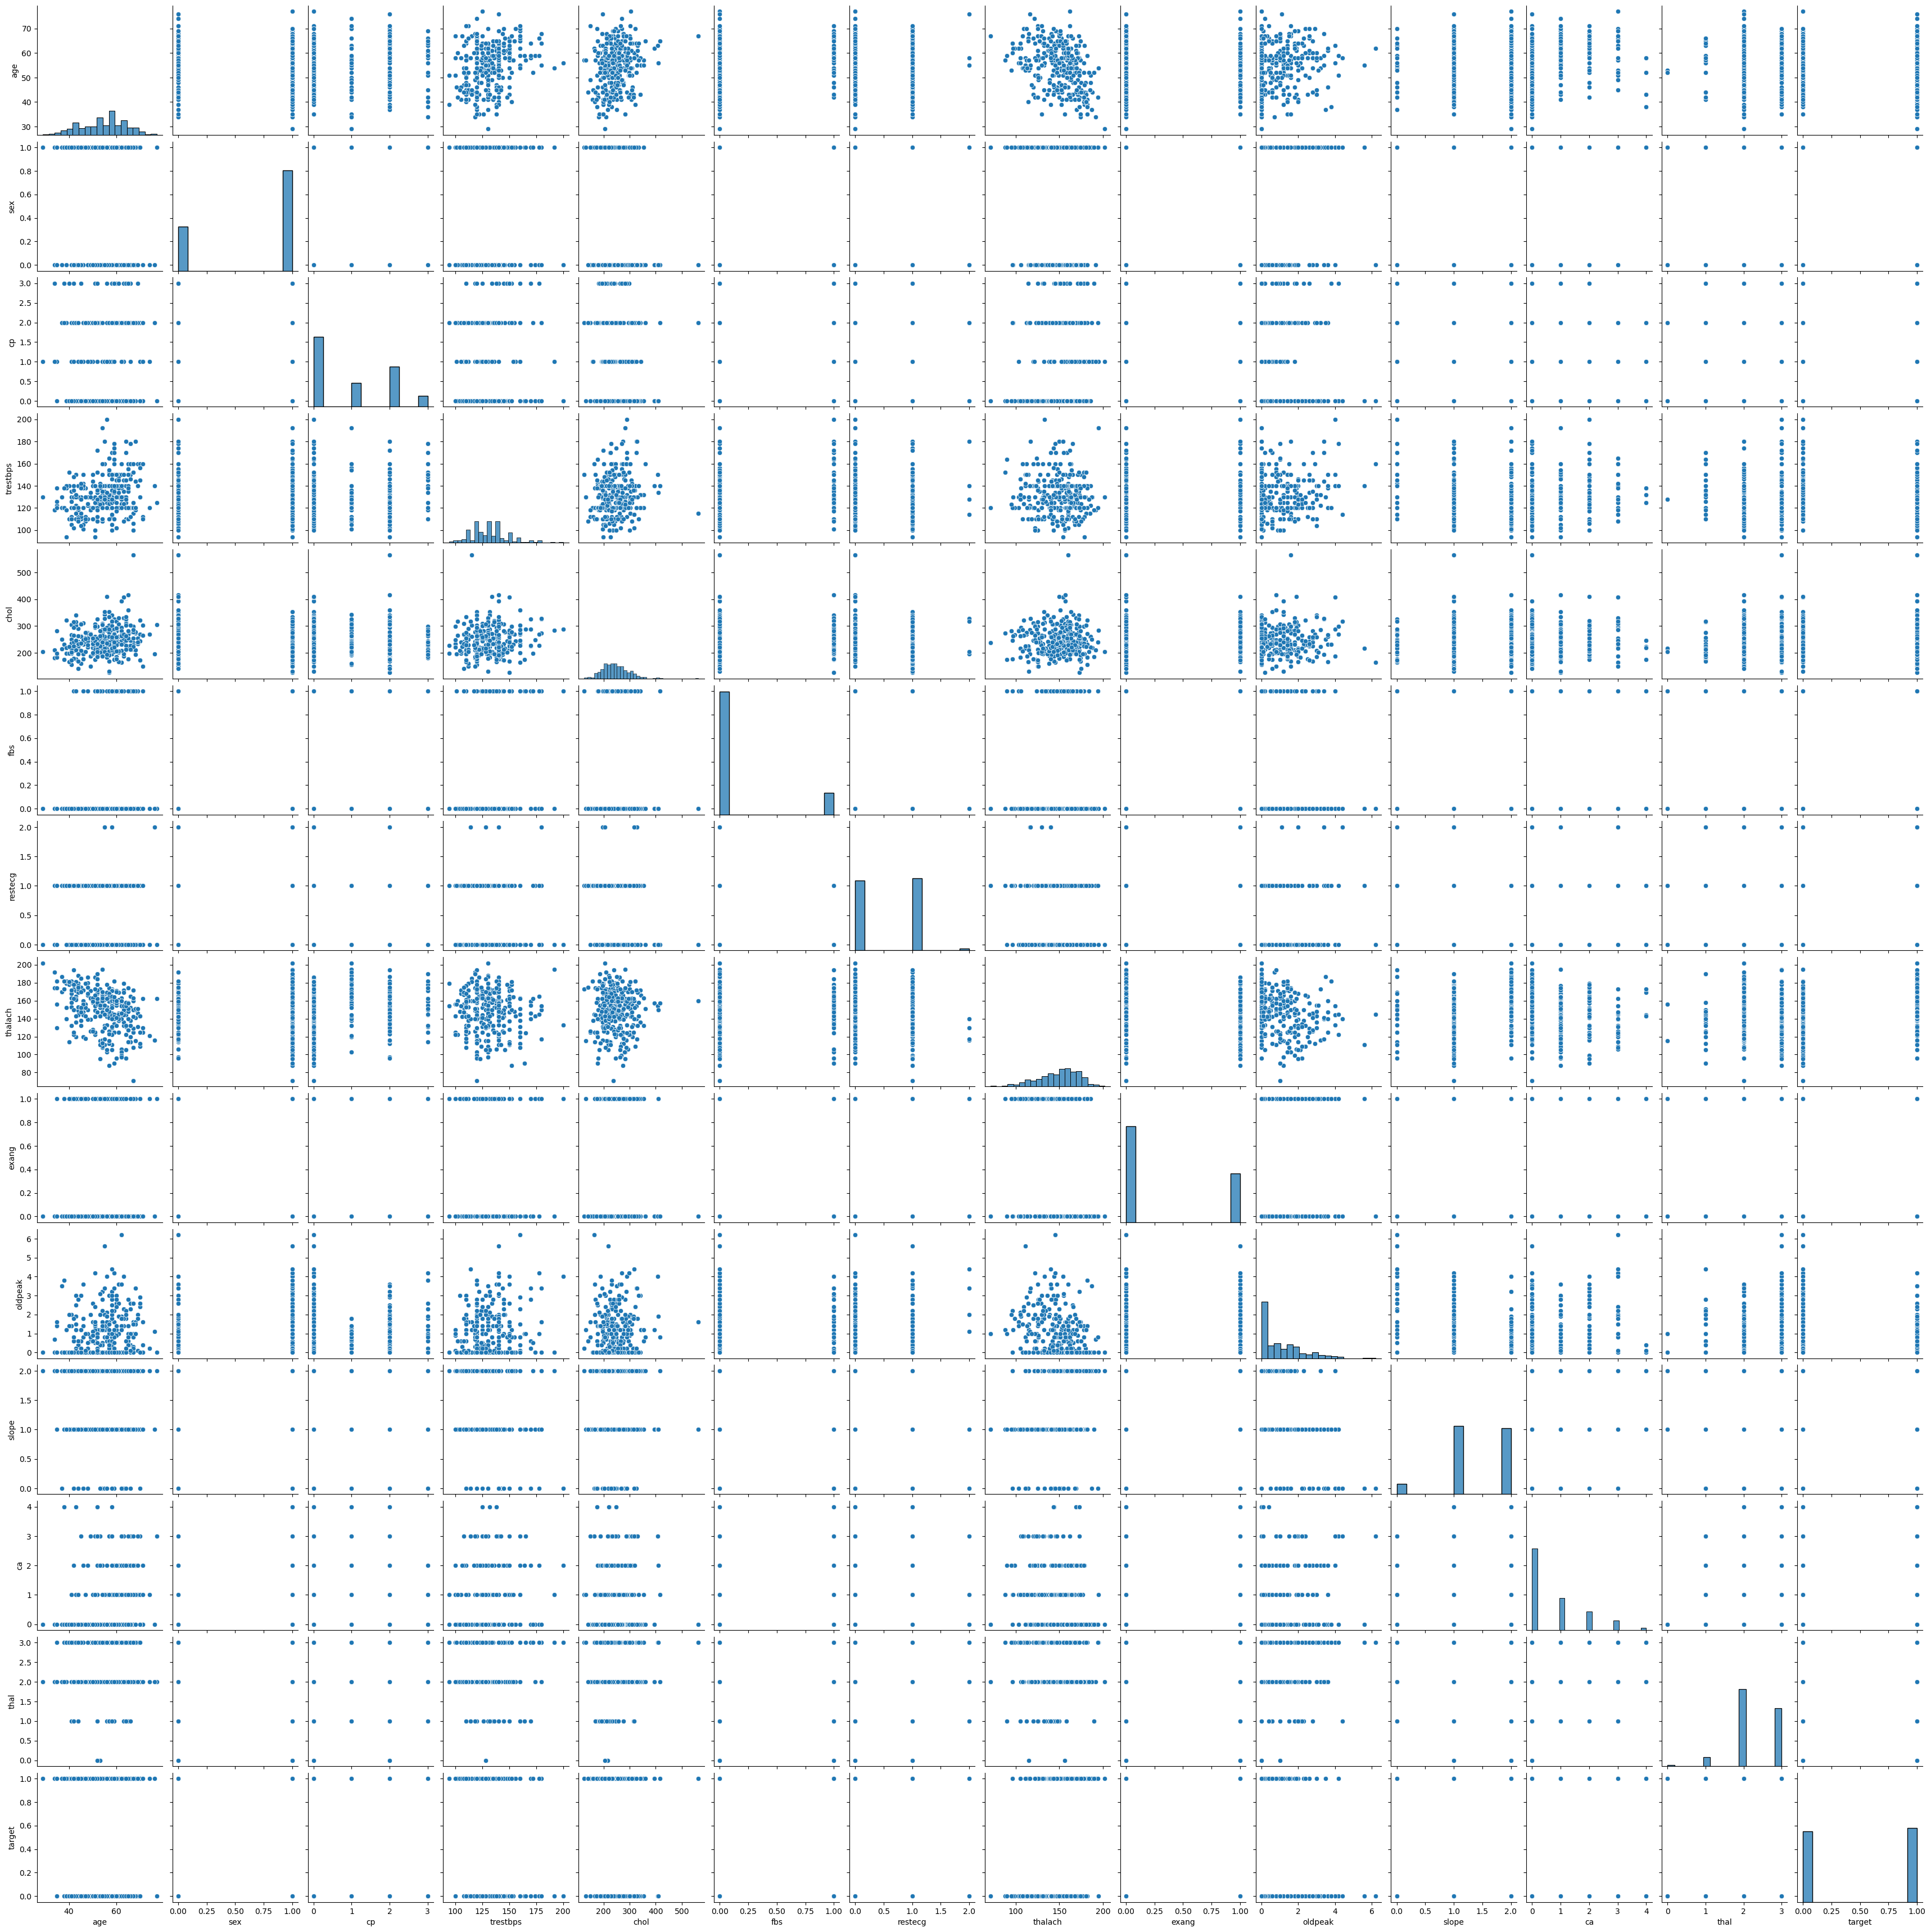

In [11]:
sns.pairplot(df)

In [12]:
df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [13]:
X=df.drop(columns='target', axis=1)
Y=df['target']

In [14]:
X=df.iloc[: ,:13]
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [53]:
Y=df.iloc[: ,13]
Y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)


In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)


In [57]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression(random_state=43)
lr_model.fit(X_train, Y_train)

C:\Users\Nar Een\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=43)

In [58]:
lr_pred= lr_model.predict(X_test)
lr_pred

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1], dtype=int64)

In [59]:
from sklearn.metrics import classification_report, accuracy_score, f1_score
lr_cr=classification_report(Y_test, lr_pred)
print(lr_cr)

              precision    recall  f1-score   support

           0       0.92      0.80      0.86       123
           1       0.84      0.93      0.88       134

    accuracy                           0.87       257
   macro avg       0.88      0.87      0.87       257
weighted avg       0.88      0.87      0.87       257



In [61]:
from sklearn.metrics import classification_report, accuracy_score, f1_score
lr_cr=classification_report(Y_test, lr_pred)
print(lr_cr)

              precision    recall  f1-score   support

           0       0.92      0.80      0.86       123
           1       0.84      0.93      0.88       134

    accuracy                           0.87       257
   macro avg       0.88      0.87      0.87       257
weighted avg       0.88      0.87      0.87       257



In [62]:
from sklearn.tree import DecisionTreeClassifier
dt_model= DecisionTreeClassifier(criterion='entropy', random_state=0)  
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [63]:
dt_pred= dt_model.predict(X_test)
dt_pred

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

In [64]:
dt_cr=classification_report(Y_test, dt_pred)
print(dt_cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       123
           1       1.00      1.00      1.00       134

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



In [65]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, Y_train)

SVC()

In [66]:
svc_pred= svc_model.predict(X_test)
svc_pred

array([1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1], dtype=int64)

In [67]:
svc_cr=classification_report(Y_test, svc_pred)
print(svc_cr)

              precision    recall  f1-score   support

           0       0.76      0.70      0.73       123
           1       0.74      0.80      0.77       134

    accuracy                           0.75       257
   macro avg       0.75      0.75      0.75       257
weighted avg       0.75      0.75      0.75       257



In [68]:
from sklearn.neighbors import KNeighborsClassifier  
knn_model= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
knn_model.fit(X_train, Y_train)

KNeighborsClassifier()

In [69]:
knn_pred= knn_model.predict(X_test)
knn_pred

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [70]:
knn_cr=classification_report(Y_test, knn_pred)
print(knn_cr)

              precision    recall  f1-score   support

           0       0.71      0.78      0.74       123
           1       0.78      0.71      0.74       134

    accuracy                           0.74       257
   macro avg       0.74      0.74      0.74       257
weighted avg       0.75      0.74      0.74       257



In [71]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [72]:
xgb_pred= xgb_model.predict(X_test)
xgb_pred

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [73]:
xgb_cr=classification_report(Y_test, xgb_pred)
print(xgb_cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       123
           1       1.00      1.00      1.00       134

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



In [74]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)


# Logistic regerssion model
lr_model_scores = cross_val_score(lr_model,X, Y, cv=kf)

# Decision tree model
dt_model_scores = cross_val_score(dt_model,X, Y, cv=kf)

# KNN model
knn_model_scores = cross_val_score(knn_model,X, Y, cv=kf)

# Support Vector Classifier model
svc_model_scores = cross_val_score(svc_model,X, Y, cv=kf)

# XGBoost model
xgb_model_scores = cross_val_score(xgb_model,X, Y, cv=kf)

print("Logistic regression models' average accuracy:", np.mean(lr_model_scores))
print("Decision tree models' average accuracy:", np.mean(dt_model_scores))
print("KNN models' average accuracy:", np.mean(knn_model_scores))
print("Support Vector Classifier models' average accuracy:", np.mean(svc_model_scores))
print("XGBoost models' average accuracy:", np.mean(xgb_model_scores))

C:\Users\Nar Een\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nar Een\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

Logistic regression models' average accuracy: 0.8419760137064534
Decision tree models' average accuracy: 0.9970873786407767
KNN models' average accuracy: 0.7471920807157815
Support Vector Classifier models' average accuracy: 0.7023986293546545
XGBoost models' average accuracy: 0.9970873786407767


In [75]:
# accuracy on training data
X_train_prediction = dt_model.predict(X_train)
dt_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [76]:
print('Accuracy on Training data : ', dt_data_accuracy)

Accuracy on Training data :  1.0


In [77]:
# accuracy on test data
X_test_prediction = dt_model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [78]:
# accuracy on test data
X_test_prediction = lr_model.predict(X_test)
lr_test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
lr_test_data_accuracy


0.8715953307392996

In [79]:
# accuracy on test data
X_test_prediction = knn_model.predict(X_test)
knn_test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
knn_test_data_accuracy


0.7431906614785992

In [80]:
# accuracy on test data
X_test_prediction = svc_model.predict(X_test)
svc_test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
svc_test_data_accuracy


0.7509727626459144

In [81]:
# accuracy on test data
X_test_prediction = xgb_model.predict(X_test)
xgb_test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
xgb_test_data_accuracy

1.0

In [82]:
print('Accuracy on Training data : ', test_data_accuracy)


Accuracy on Training data :  1.0


In [83]:
X_train_prediction = lr_model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
training_data_accuracy 


0.8645833333333334

In [84]:
# accuracy on train data
X_train_prediction = knn_model.predict(X_train)
knn_data_accuracy = accuracy_score(X_train_prediction, Y_train)
knn_data_accuracy

0.8984375

In [85]:
# accuracy on train data
X_train_prediction = svc_model.predict(X_train)
svc_data_accuracy = accuracy_score(X_train_prediction, Y_train)
svc_data_accuracy

0.69921875

In [86]:
# accuracy on train data
X_train_prediction = xgb_model.predict(X_train)
xgb_data_accuracy = accuracy_score(X_train_prediction, Y_train)
xgb_data_accuracy

1.0

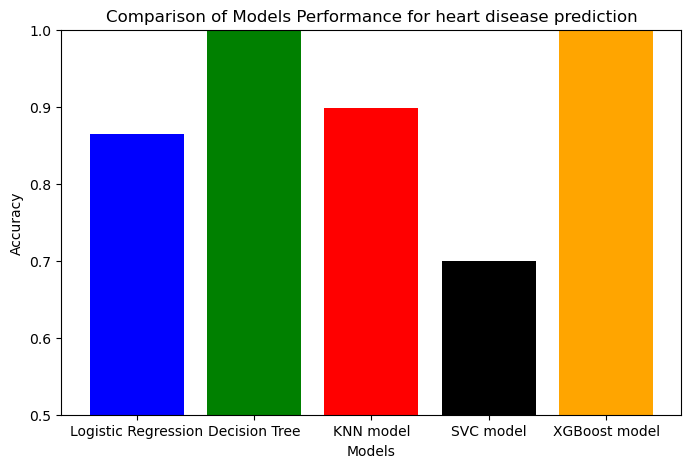

In [87]:
import matplotlib.pyplot as plt

# Accuracy scores of different models
models = ['Logistic Regression', 'Decision Tree','KNN model','SVC model','XGBoost model']
accuracy_scores = [training_data_accuracy, dt_data_accuracy, knn_data_accuracy, svc_data_accuracy, xgb_data_accuracy]

# Create a bar plot
plt.figure(figsize=(8, 5))
plt.bar(models, accuracy_scores, color=['blue', 'green', 'red','black','orange'])
plt.title('Comparison of Models Performance for heart disease prediction')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.5, 1.0)  # Set y-axis limits for better visualization
plt.show()


In [88]:
import pickle

In [89]:
filename = 'heart_disease_model.pkll'
pickle.dump(dt_model, open(filename, 'wb'))

C:\Users\Nar Een\AppData\Local\Temp\ipykernel_8228\3601799593.py:2: ResourceWarning: unclosed file <_io.BufferedWriter name='heart_disease_model.pkll'>
  pickle.dump(dt_model, open(filename, 'wb'))


In [90]:
import streamlit as st

# Set page title
st.title('Simple Streamlit Web App')

# Add a text input box
user_input = st.text_input("Enter some text:")

# Add a button
button_clicked = st.button("Click me!")

# Check if the button is clicked
if button_clicked:
    # Output the text entered by the user
    st.write("You entered:", user_input)


2024-03-31 01:51:34.545 
  command:

    streamlit run C:\Users\Nar Een\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [91]:
# from sklearn.preprocessing import LabelEncoder
# import pickle

# # Assume you have a list of categorical data
# data = [,]

# # Initialize and train LabelEncoder
# label_encoder = LabelEncoder()
# label_encoder.fit(data)

# # Save LabelEncoder to a file
# with open("label_encoder.pkl", "wb") as f:
#     pickle.dump(label_encoder, f)

# # Later, in your Streamlit app:

# import streamlit as st

# # Load LabelEncoder from the file
# with open("label_encoder.pkl", "rb") as f:
#     label_encoder = pickle.load(f)

# # Get text input from the user
# text_input = st.text_input("Enter a category:", "")

# # Use the loaded LabelEncoder to transform text input into numeric format
# if text_input:
#     transformed_input = label_encoder.transform([text_input])[0]
#     st.write("Transformed input:", transformed_input)
